<div style="text-align: center;">
    <img src="image_path.png" alt="Alt Text">
</div>

## Problem statement

#### Intro
* We are here with Jamboree Data set, Oragnization who into to coaching and teaching industry of like GMAT, GRE, and SAT since 1993.

#### Buisness requirement
* Organization wants to develop a model whihc is capable of estimating an applicant's likelihood of admission across the global colleges.

#### Buisness Need
* This will help the organization make a proper streamline and customised structure course for the student of different capabalities.
* This will ensure the admission of a student at specific range of college upto a great certainity and bring satisfatorty result.
* Further, this will draw more students to the buisness unit.
* Hence more sucessfull buisness from organization point of view.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
data = pd.read_csv(r"D:\Scaler\case_study\Admission_Predict_Ver1.1.csv")

In [3]:
import copy 

In [4]:
df =copy.deepcopy(data)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Insights: 
* There are no null values in ny features or columns.
* All are int64 and float64 data type columns.

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [9]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.isna().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [11]:
# range of values for each feature
for i in df.columns:
    print(f'Range of values for {i}: {df[i].min()} and {df[i].max()}')
    print('-'*50)

Range of values for Serial No.: 1 and 500
--------------------------------------------------
Range of values for GRE Score: 290 and 340
--------------------------------------------------
Range of values for TOEFL Score: 92 and 120
--------------------------------------------------
Range of values for University Rating: 1 and 5
--------------------------------------------------
Range of values for SOP: 1.0 and 5.0
--------------------------------------------------
Range of values for LOR : 1.0 and 5.0
--------------------------------------------------
Range of values for CGPA: 6.8 and 9.92
--------------------------------------------------
Range of values for Research: 0 and 1
--------------------------------------------------
Range of values for Chance of Admit : 0.34 and 0.97
--------------------------------------------------


## 📈 Graphical Analysis

In [12]:
# Drop serial no col which is no use for further analysis
df.drop('Serial No.', axis=1, inplace=True)

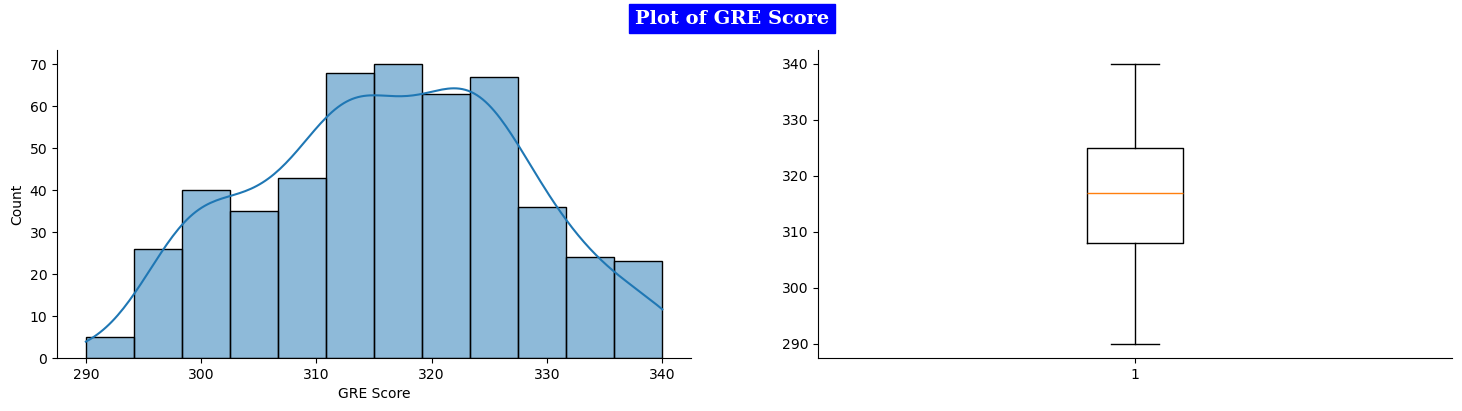

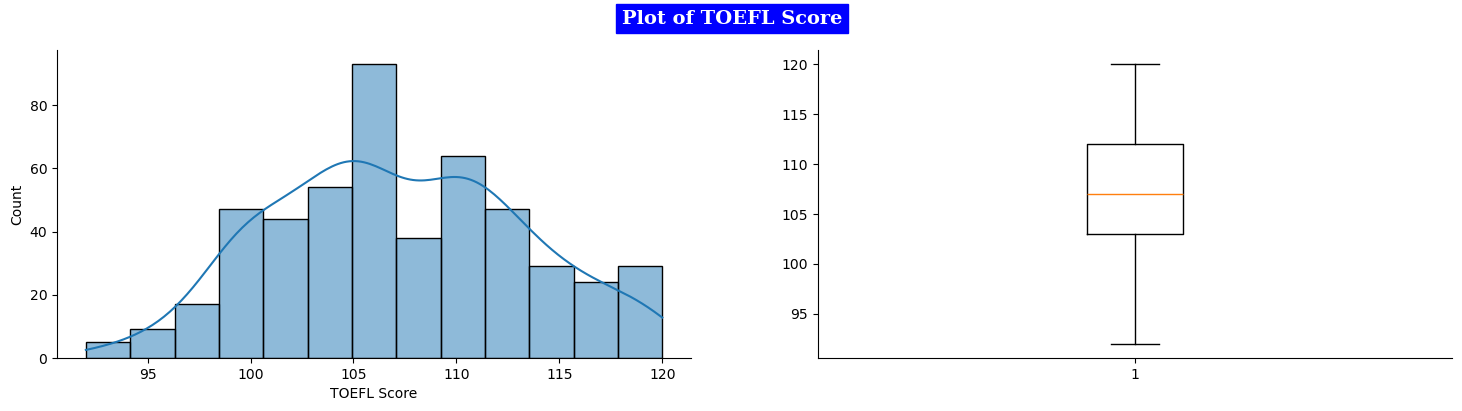

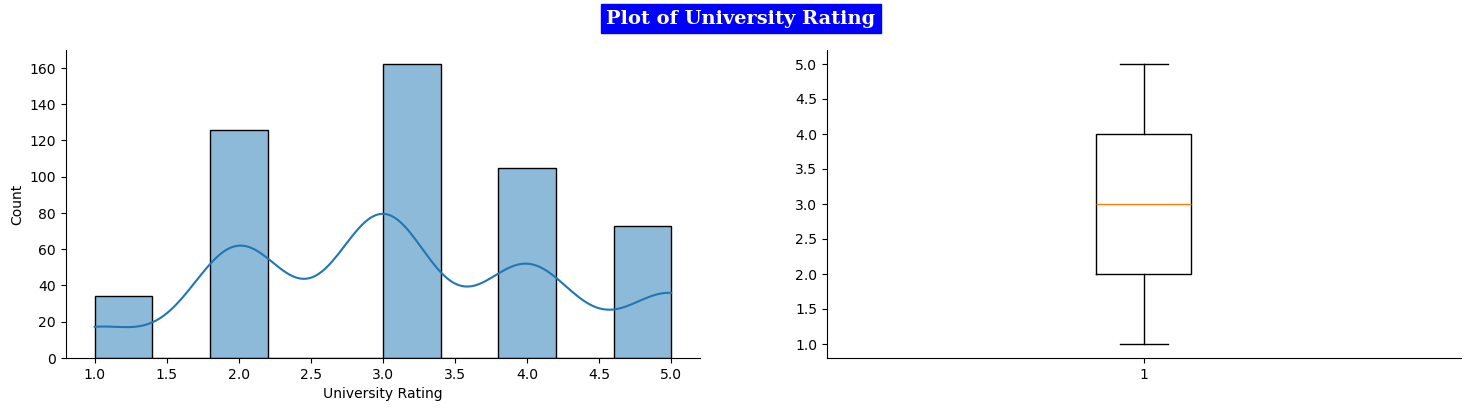

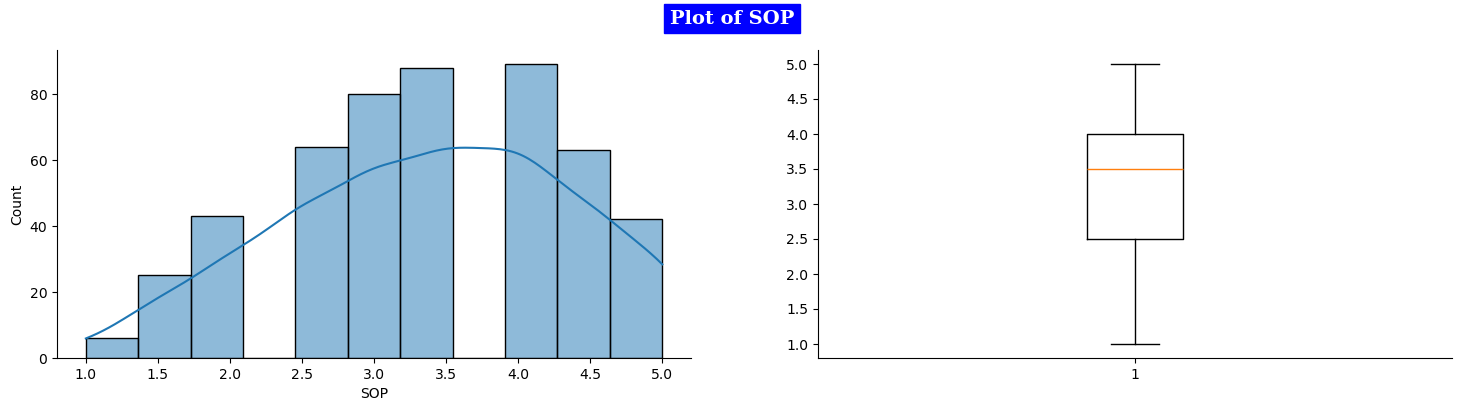

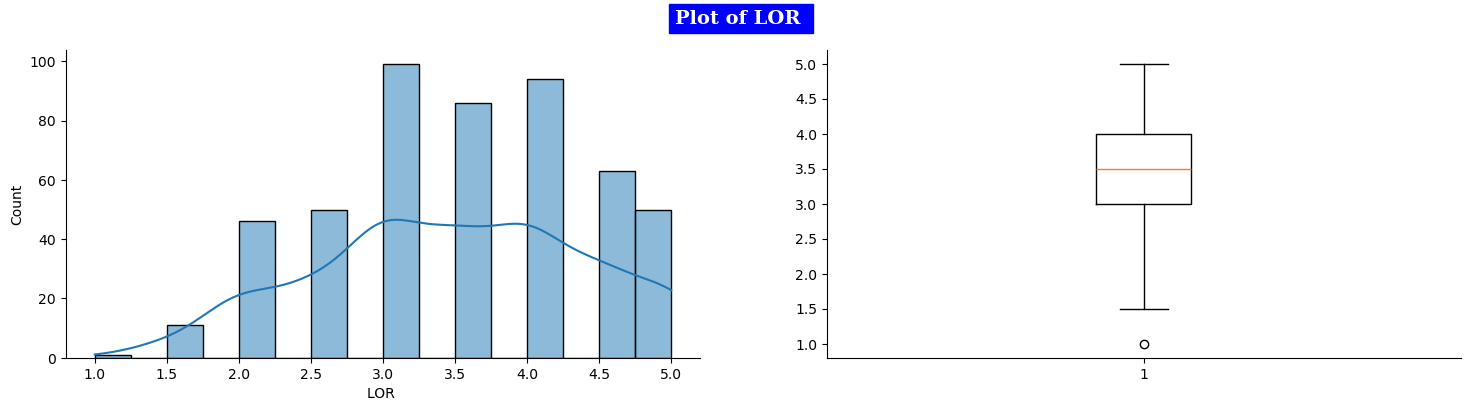

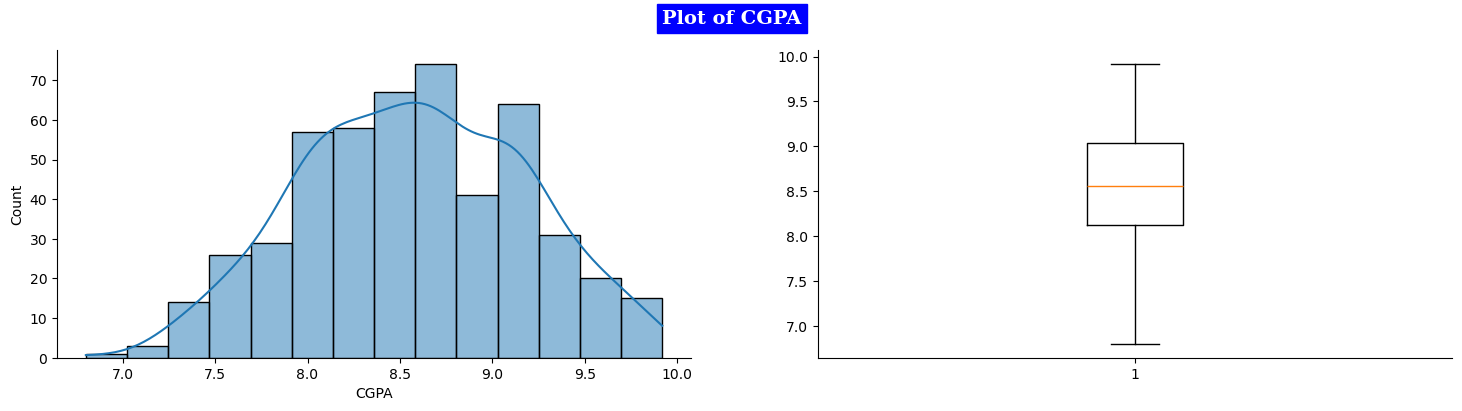

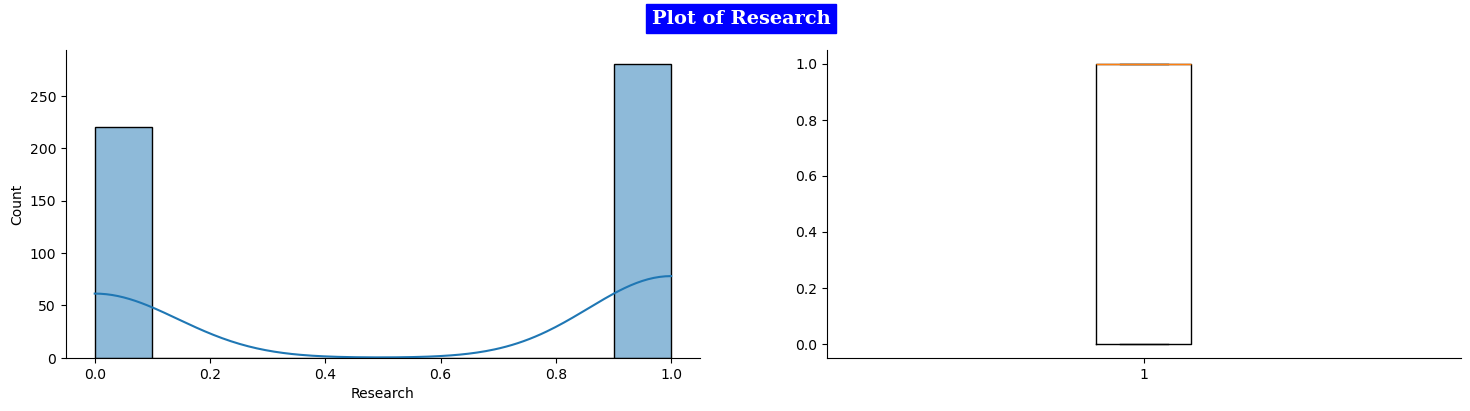

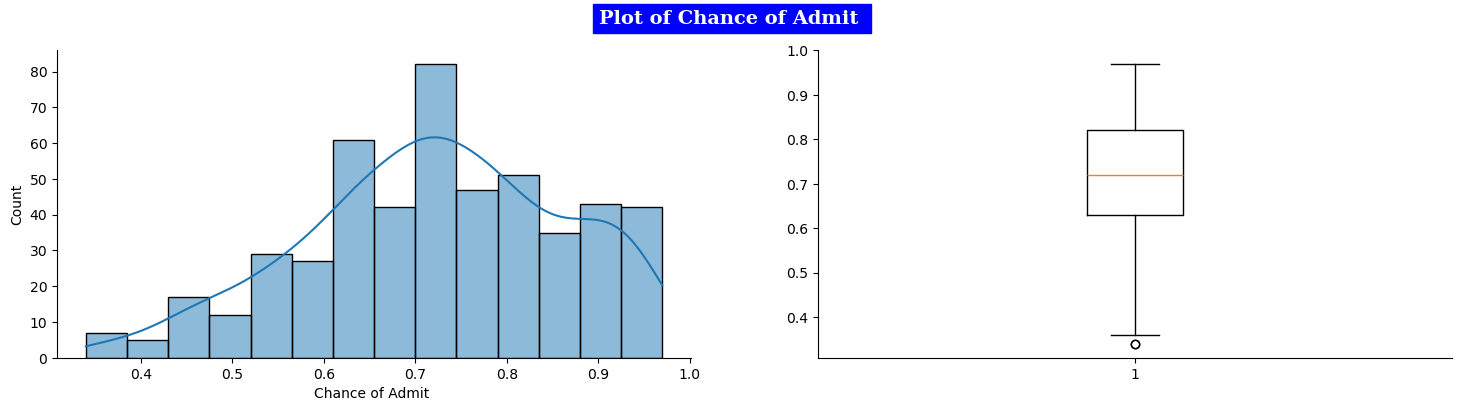

In [13]:
# Dsiplaying the graph of all cols
for i in df.columns:
    plt.figure(figsize = [18,4])
    plt.subplot(121)
    sns.histplot(df[i], kde=True)
    plt.subplot(122)
    plt.boxplot(df[i])
    plt.suptitle(f'Plot of {i}',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='b',color='w')
    sns.despine()
    plt.show()

### Insight: 
* LOR has outliers but they kind of ratings as in categorical data. No need to treat this data.

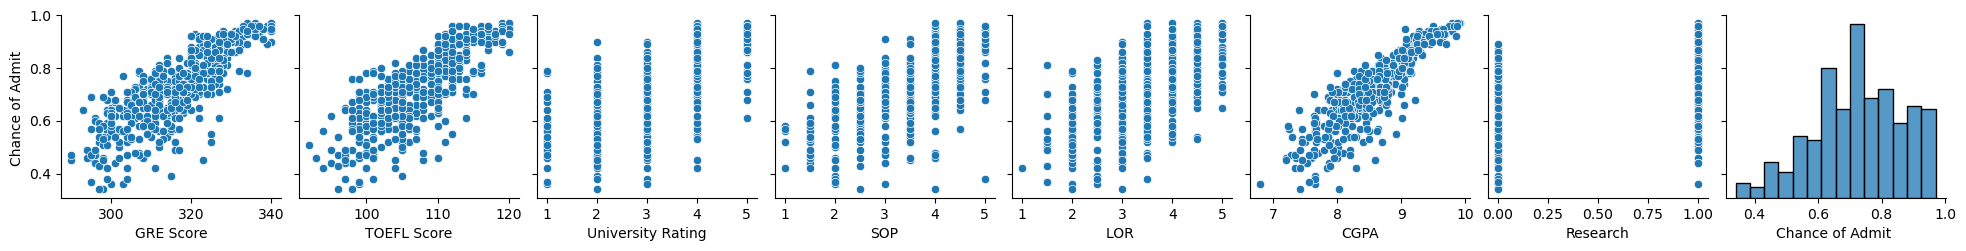

In [14]:
sns.pairplot(data=df, y_vars='Chance of Admit ')
plt.show()

#### 🏷️Insights:

* Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

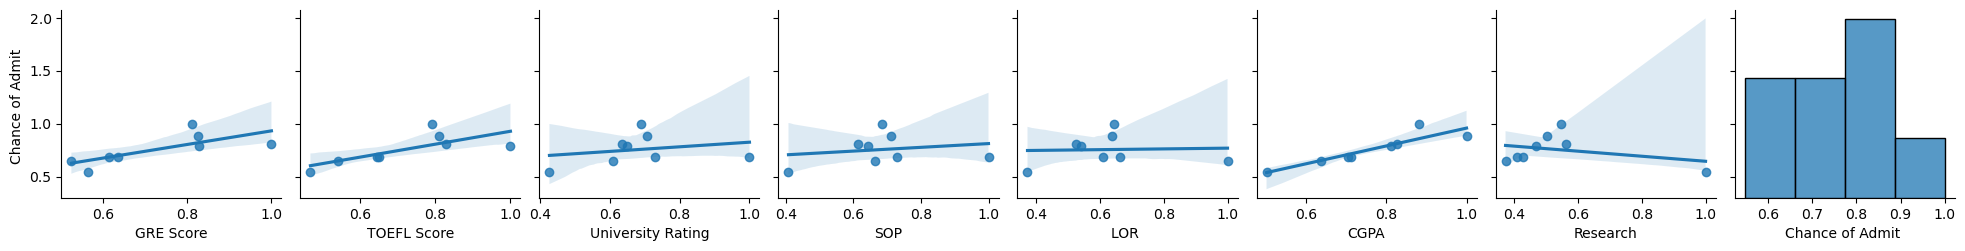

In [15]:
sns.pairplot(df.corr(),y_vars='Chance of Admit ',kind= 'reg')

GRE Score


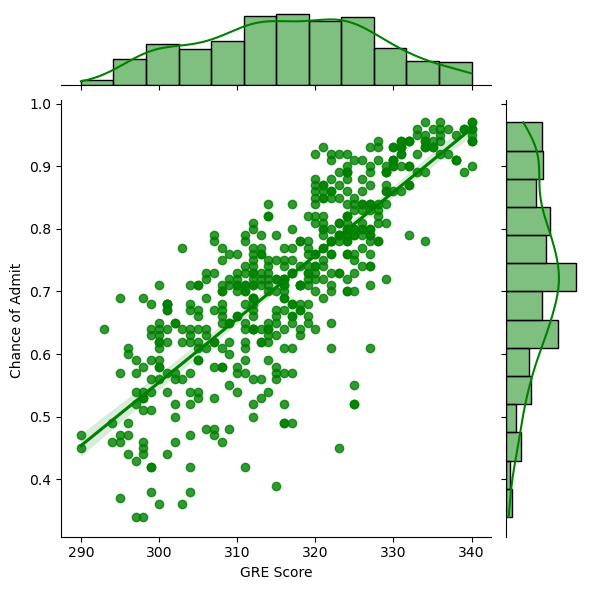

TOEFL Score


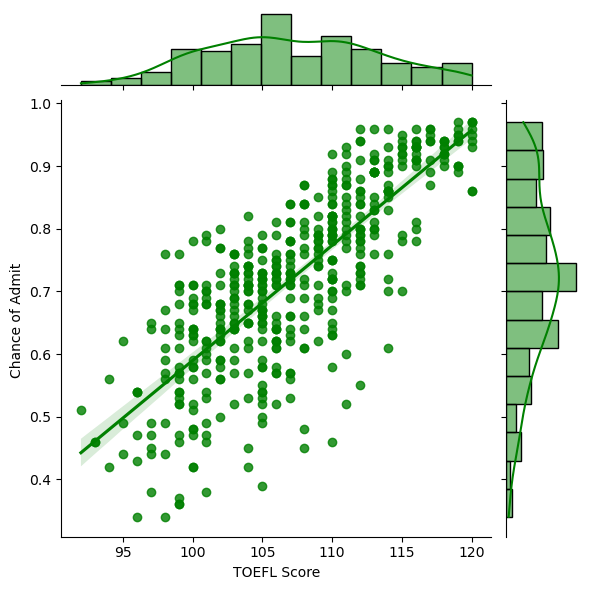

University Rating


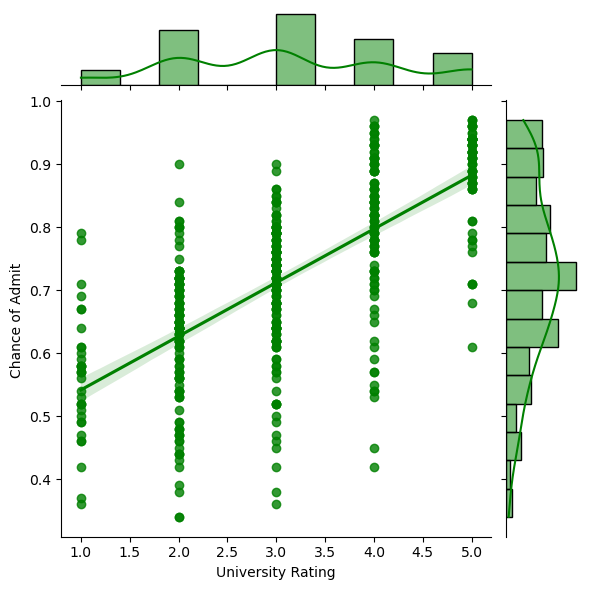

SOP


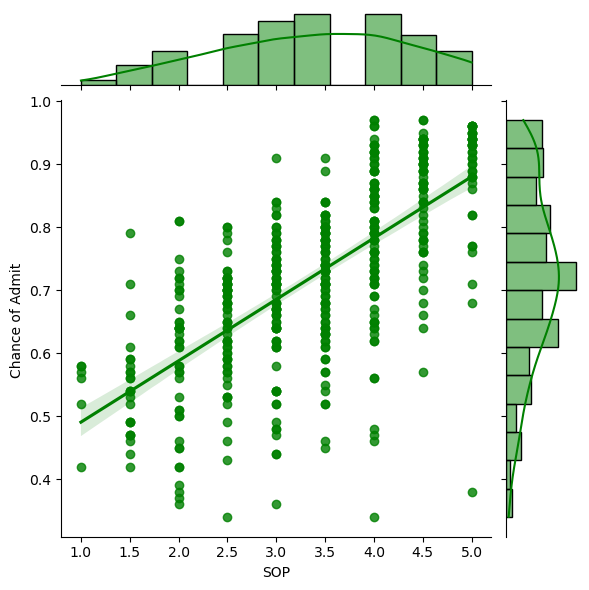

LOR 


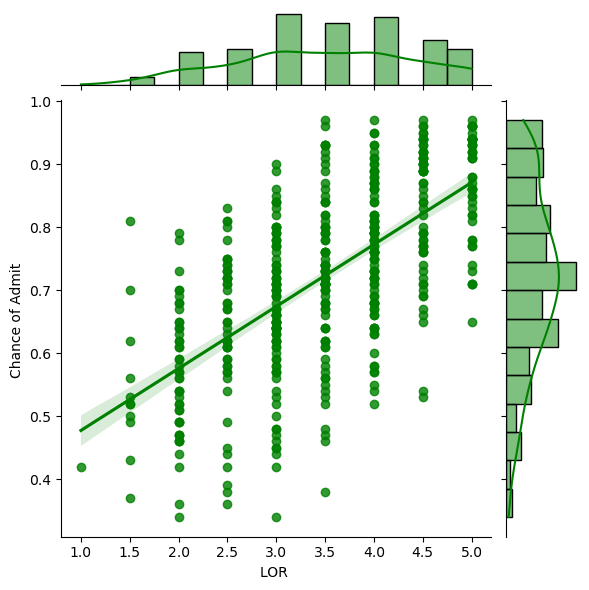

CGPA


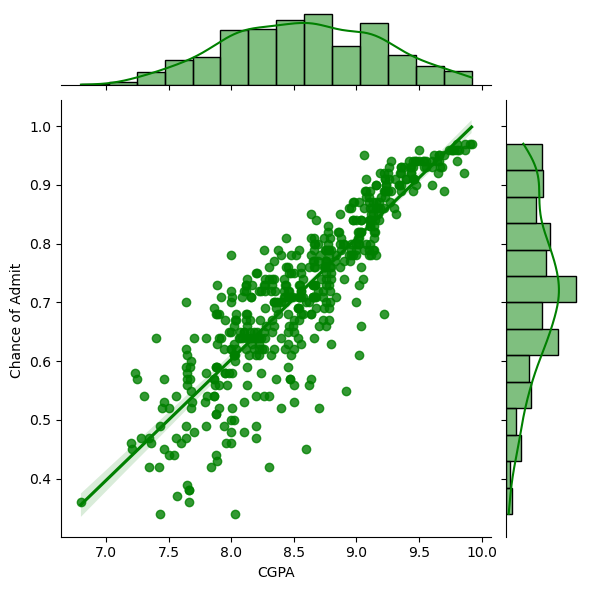

Research


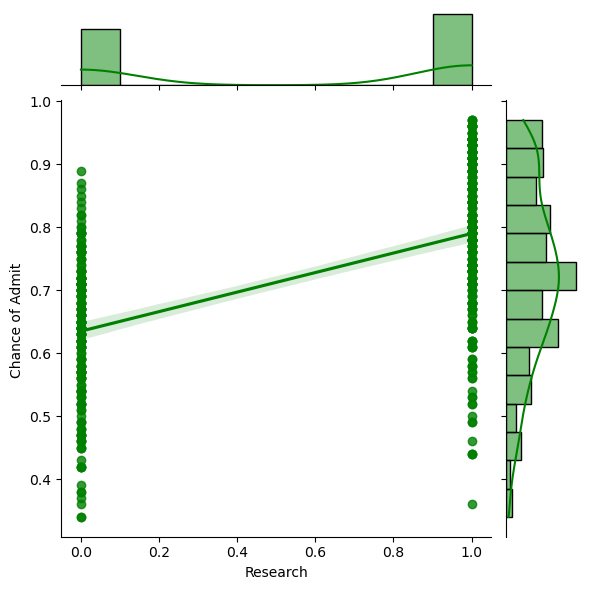

In [16]:
for col in df.columns[:-1]:
    print(col)
    sns.jointplot(data=df,x=df[col],y=df["Chance of Admit "],kind="reg",color='g')
    plt.show()

#### 🏷️Insights:

- with higher GRE score , there is high probability of getting an admition.

- Students having high toefl score , has higher probability of getting admition . 

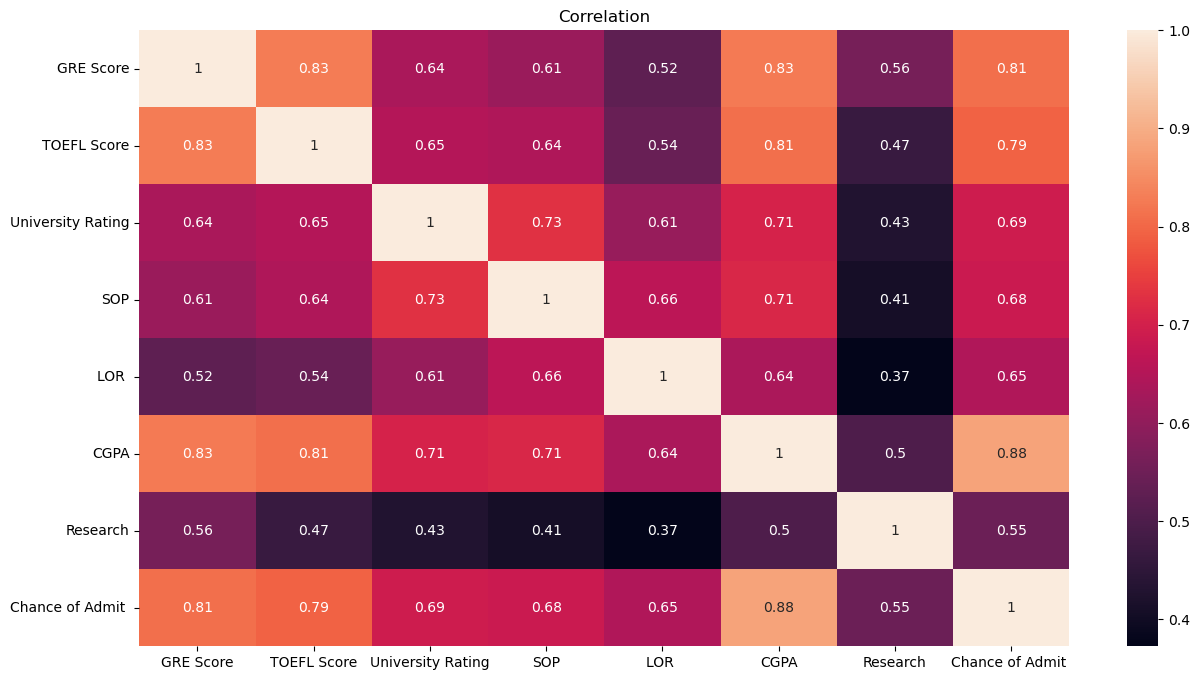

In [17]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.show()

## Data Preprocessing

#### Lets Normalize the features in dataset

In [18]:
Scaler = StandardScaler()
Scaler_df = pd.DataFrame(Scaler.fit_transform(df), columns=df.columns)
Scaler_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


<Axes: xlabel='Chance of Admit ', ylabel='GRE Score'>

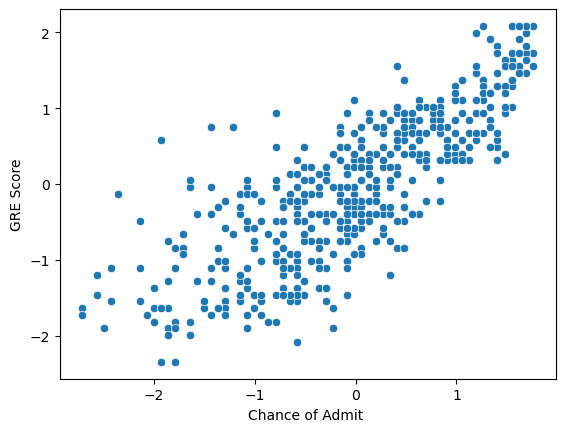

In [19]:
sns.scatterplot(Scaler_df, x=Scaler_df['Chance of Admit '], y=Scaler_df['GRE Score'])

In [20]:
y = Scaler_df['Chance of Admit ']
X = Scaler_df.drop('Chance of Admit ', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
X_train.shape

(400, 7)

In [23]:
y_train.shape

(400,)

### Linear Regression Model

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [27]:
y_train.shape

(400,)

In [28]:
model.coef_

array([0.19482262, 0.12909489, 0.02081226, 0.01273465, 0.11302848,
       0.48219942, 0.08458618])

In [29]:
model.intercept_

0.007735680758563207

In [30]:
X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [31]:
# train data set R2 score
model.score(X_train, y_train)

0.8210671369321554

In [32]:
# Test data set R2 score
model.score(X_test, y_test)

0.8188432567829628

In [33]:
model

LinearRegression()

#### Insights:

* CGPA,GRE,TOEFL scores have the highest weight
* SOP, University rating, and research have the lowest weights

In [34]:
# Adjusted R2 
R2 = model.score(X_train, y_train)

a = 1 - R2
b = len(X_train) - 1
c = len(X_train) - X_train.shape[1] - 1

adj_R2 = 1 - ((a*b)/c)

round(adj_R2,2)

0.82

 ### Insight:
* R2 score for train and test data are almost same.
* Adjusted R2 score is also same 0.82.
  
* We can conclude that there is no overfitting of the data.
* This is a sign that the predictors in the model are all contributing to its explanatory power without redundant or irrelevant variables.

## Linear Regression Using OLS

In [35]:
X_train_constant = sm.add_constant(X_train)
modelols = sm.OLS(y_train, X_train_constant)
results = modelols.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          3.41e-142
Time:                        21:52:33   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

* We can see very low p_valued Features and highly weighted coef features as the major contributers of Model Prediction, `CGPA,GRE,TOEFL,LOR` are the features contributing to model building. We will leave it as it is.

### We will test the assumptions of linear regression.
* Multicollinearity check by VIF score
* Mean of residuals should be close to zero.
* Linear relationship between independent & dependent variables.
* Test for Homoscedasticity
* Normality of residuals.

### Multicollinearity check by VIF score

In [36]:
vif = pd.DataFrame()

In [37]:
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = True)
vif

,Feature,VIF
6,Research,1.52
4,LOR,1.98
2,University Rating,2.57
3,SOP,2.79
1,TOEFL Score,3.67
0,GRE Score,4.49
5,CGPA,4.65


#### Insights:
    
* As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity between the features.

### Mean of residuals check

In [38]:
residuals_test = y_test - model.predict(X_test)
residuals_test.mean()

-0.03867840379282771

In [39]:
residuals_train = y_train - model.predict(X_train)
residuals_train.mean()

3.3306690738754695e-18

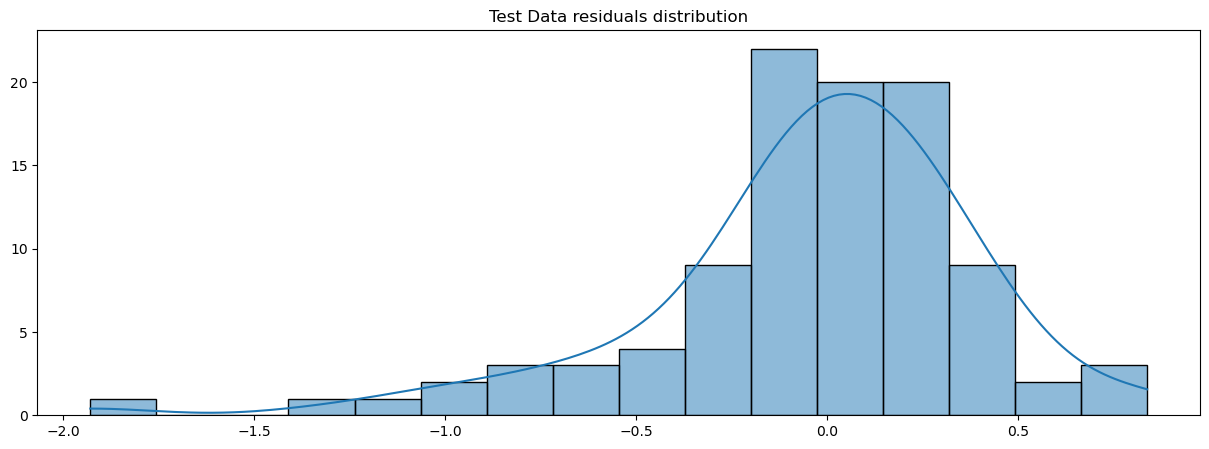

In [40]:
plt.figure(figsize = [15,5])
sns.histplot(residuals_test, kde=True)
plt.title('Test Data residuals distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

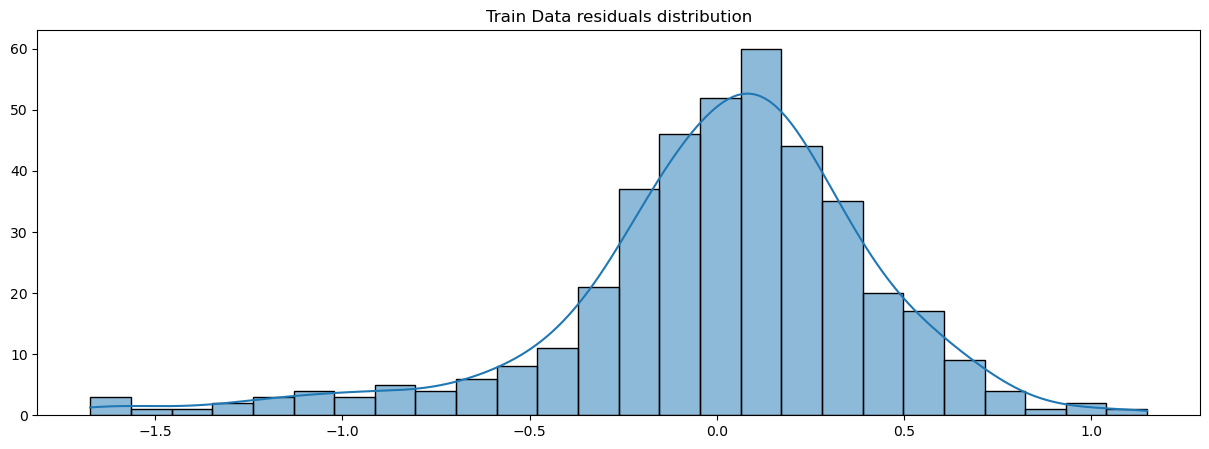

In [41]:
plt.figure(figsize = [15,5])
sns.histplot(residuals_train, kde=True)
plt.title('Train Data residuals distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Insights:

* Since the mean of residuals is very close to 0, we can say that the model is `UnBiased`.

## We will carry out two assumption check here.
#### 1. Linear relationship check between independent & dependent variables.
#### 2. Check for Homoscedasticity

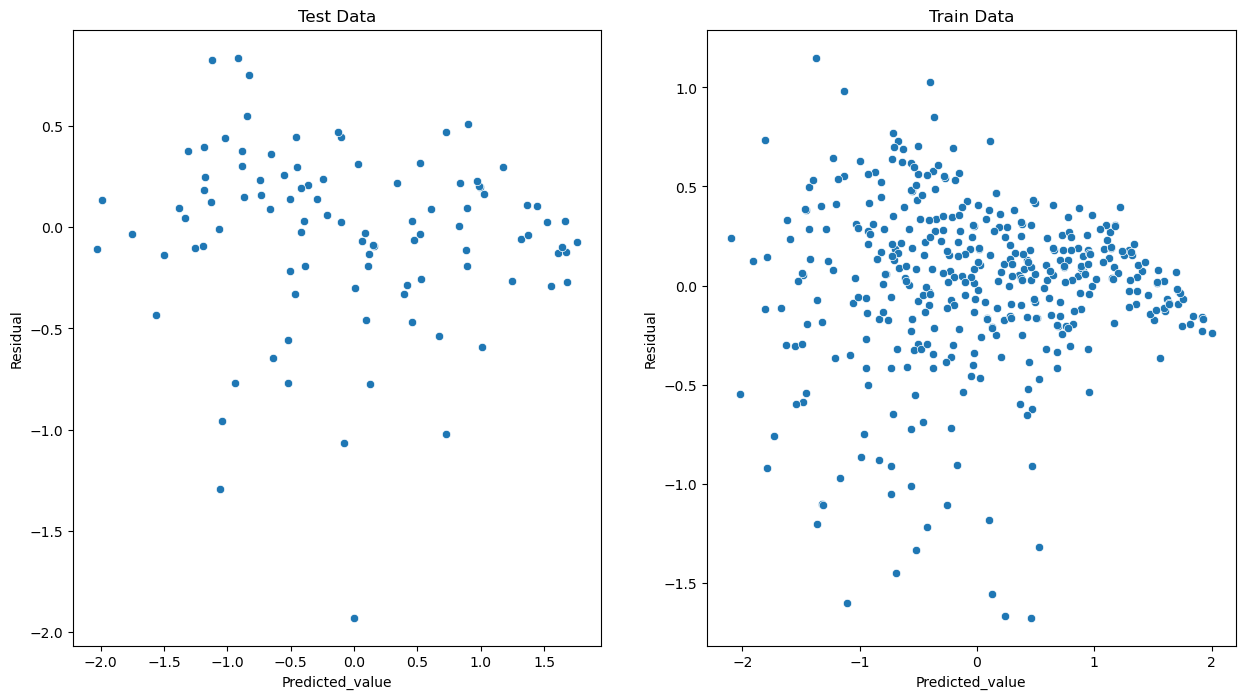

In [42]:
# Scatterplot of residuals with each independent variable to check for Linear relationaship & Homoscedasticity
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sns.scatterplot(y=residuals_test, x = model.predict(X_test))
plt.ylabel('Residual')
plt.xlabel('Predicted_value')
plt.title('Test Data')

plt.subplot(1,2,2)
sns.scatterplot(y=residuals_train, x = model.predict(X_train))
plt.ylabel('Residual')
plt.xlabel('Predicted_value')
plt.title('Train Data')
plt.show()

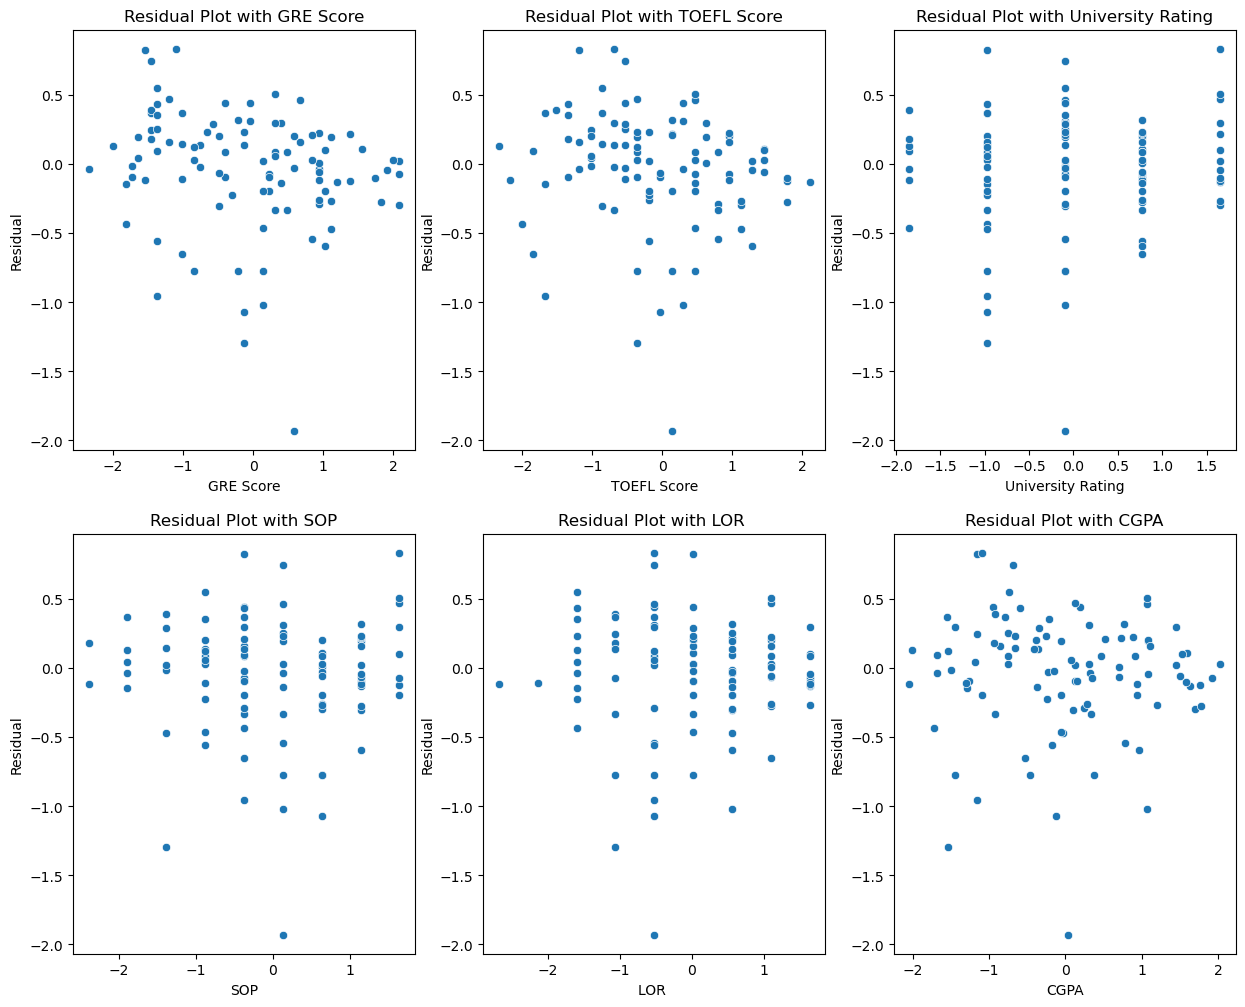

In [43]:
# Scatterplot of residuals with each independent variable to check for Linear relationaship & Homoscedasticity
plt.figure(figsize=(15,12))
i=1
for col in X_test.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x=X_test[col], y=residuals_test)
    plt.title(f'Residual Plot with {col}')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1
plt.show();

### Insights:
    
* From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

* As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

* In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.


### We will Perform a Goldfeld-Quandt test to check the presence of Heteroscedasticity in the data.

In [44]:
# Null Hypothesis Ho ------> Data point have Homoscedasticity nature.
# Alternative Hypothesis Ha ------> Data points lack Homoscedasticity nature (Heteroscedasticity in nature)
# Alpha = 0.05

In [45]:
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [46]:
gq_df = X_test

In [47]:
gq_df['Y'] = y_test

In [48]:
gq_df.rename(columns = {'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR'}, inplace=True)

In [49]:
gq_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Y'],
      dtype='object')

In [50]:
gq_df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Y
361,1.553371,1.449690,0.775582,0.632315,0.017306,1.594750,0.886405,1.477030
73,-0.219074,0.132987,0.775582,1.137360,0.558125,0.767220,0.886405,0.838728
374,-0.130452,-0.360777,-0.975168,-1.387862,-1.064332,-1.533314,-1.128152,-2.352779
155,-0.396319,0.297575,-0.099793,-0.377773,-0.523513,0.187949,-1.128152,0.342271
104,0.844393,0.791338,-0.099793,0.127271,-0.523513,0.783770,0.886405,0.129504
...,...,...,...,...,...,...,...,...
347,-1.548408,-2.171243,-1.850542,-2.397950,-2.686789,-2.046382,-1.128152,-2.140012
86,-0.130452,-0.196189,-0.099793,1.137360,0.017306,-0.258918,-1.128152,-0.012340
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405,-0.012340
438,0.135415,0.462163,-1.850542,-0.882817,0.017306,-0.060310,0.886405,-0.366952


In [51]:
model = smf.ols('y_test ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + CGPA + Research', data=gq_df).fit()

In [52]:
gq_test = het_goldfeldquandt(y=model.model.endog, x=model.model.exog)
print('Goldfeld-Quandt test F-statistic:', gq_test[0])
print('Goldfeld-Quandt test p-value:', gq_test[1])

Goldfeld-Quandt test F-statistic: 0.5421223107289669
Goldfeld-Quandt test p-value: 0.9748375977319167


#### Hence P value is higher than 0.5, therefore our Null hypothesis is ture. Our data set are Homoscedasticity in nature.


### Check for Normality of Residuals:

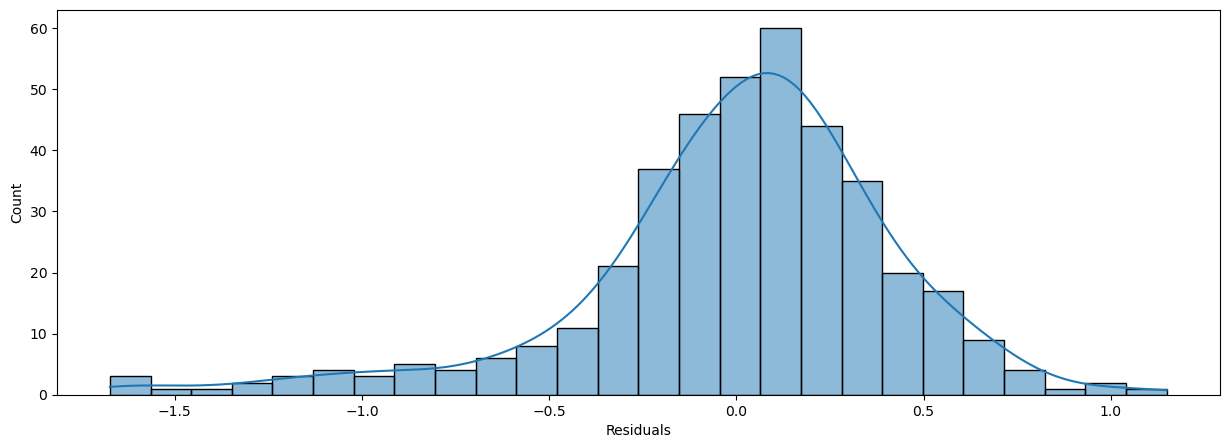

In [53]:
plt.figure(figsize=[15,5])
sns.histplot(residuals_train,kde=True)
plt.xlabel('Residuals')
plt.show()

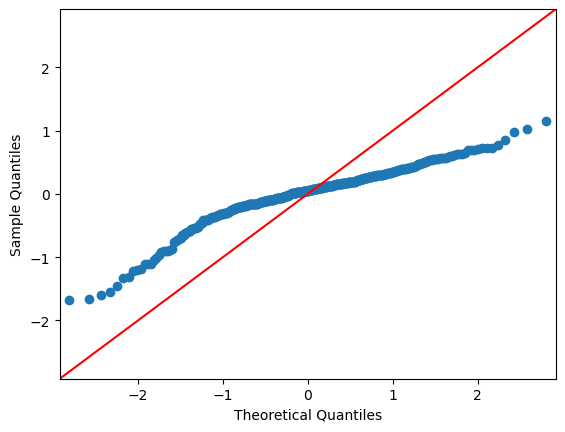

In [54]:
sm.qqplot(residuals_train,line='45')
plt.show()

### Let Perform Shapiro-Wilk test for normality check

In [55]:
#Ho ----> Data is Normaly distributed.
#Ha ----> Data is not Normaly distributed.

In [56]:
from scipy.stats import shapiro, anderson, kstest, norm

In [57]:
shapiro_stat, shapiro_p = shapiro(residuals_train)
print(f'Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p}')

Shapiro-Wilk Test: Statistic=0.929100866271022, p-value=7.734906730604523e-13


#### Hence P values is very less than 0.5. Therefore our data is not normaly distributed.

#### Insights:

* From the Histplot & kdeplot , we can see that the Residuals are `left skewed` and not perfectly normally distributed. 

* The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not `Gaussian`.

* From Shapiro Wilk test , we conclude that the Residuals are `Not Normally distributed`.

* Hence this assumption is not met.

#### But there are some methods to transform data set 

#### When a dataset does not follow normality, several techniques can be applied to transform the data to approximate a normal distribution.
#### Here are some common methods:

* Log Transformation: Apply this transformation if your data is positively skewed.
* Square Root Transformation: Use this method for moderately skewed data.
* Box-Cox Transformation:A family of power transformations that includes both log and square root transformations.
It requires the data to be strictly positive.
* Yeo-Johnson Transformation: Similar to Box-Cox but can handle zero and negative values.
* Reciprocal Transformation: Useful for data with large positive values.
* Exponential Transformation: Useful for data with a negative skew.

#### Hence as it is not mentioned in our case so we are skipping this step 

## Regression Analysis summary

> * Upon conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.

> * Additionally, GRE and TOEFL scores also exhibit significant importance in the predictive model.

> * Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below 5, indicative of low multicollinearity among predictors.

> * Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution. Furthermore, the residual plots indicate some level of heteroscedasticity.

> * We have suggested some transformation methods for further analysis to have normality in residuals.


## Business Insights & Recommendations

### Insights

> Model Predictors
- Our analysis identified several key predictors strongly correlated with admission chances. Notably, **GRE score, TOEFL score, and CGPA** emerged as significant factors influencing admission probabilities.

> Multicollinearity Check 
- Assessing multicollinearity revealed no significant issues, indicating the robustness of our model despite high correlations among predictors.

> Model Performance
- Both Linear Regression and Ridge Regression models exhibited promising performance, capturing up to 82% of the variance in admission probabilities.

> Data Distribution
- Exploratory data analysis uncovered left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.


### Recommendations:

> Feature Enhancement
- Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors significantly influence admission chances.

> Data Augmentation
- Collect a wider range of data beyond academic metrics to capture applicants' holistic profiles, including extracurricular achievements, personal statements, and diversity factors.


> Additional Features
- Given the strong correlation among CGPA, we can enrich the predictive model with additional diverse features such as Research, work experience, internships, or extracurricular activities.


By implementing these recommendations, we can further enhance our admissions process, providing valuable insights and support to both applicants and educational institutions.

-----